## Magnetic systems
---

The following exercise is modeled after one of the AbInit tutorials cocerning spin-polarized calculations.

In the following exercise we will:
* build a crystal of bcc-Iron,
* calculate magnetic moment on Iron atom,
* derive the spin-polarized electronic density of states.

As usual the detailed technical documentation regarding ASE toolbox can be found [ASE documentation site](https://wiki.fysik.dtu.dk/ase/index.html). The documentation concerning the DFT tool used in the exercise is located at [AbInit documentation site](https://docs.abinit.org/).

In [6]:
%pylab inline
from ase.build import bulk
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.calculators.abinit import Abinit
import ase.io
from ase import units as un
import os

Populating the interactive namespace from numpy and matplotlib


### Building the BCC Iron crystal



In [90]:
Fe_FM = bulk('Fe', crystalstructure='bcc', a=5.74, cubic=False)
Fe_NM = bulk('Fe', crystalstructure='bcc', a=5.74, cubic=False)

# Set initial magnetic moments for ferromagnetic BCC iron
Fe_FM.set_initial_magnetic_moments([4])

### Running Self-Consistent DFT with spin polarization

In [105]:
calc = Abinit(label='Fe_NM', directory="work_06", v8_legacy_format=True,
              # Pseudopotential parameters
              ecut = 500,              
              nband = 10,              
              pps = 'psp8', xc = 'PBE',
              ### For PAW potential comment out above line 
              ### and  uncomment the following line
              #pps = 'pawxml', pawecutdg = 750, xc = 'GGA',
              # SCF parameters
              tolvrs=1.0e-10,
              nstep=50,
              # Reciprocal space sampling
              ngkpt=[4,4,4],
              nshiftk=1,
              shiftk=[[0.5, 0.5, 0.5]],
              # Spin-polarized calculation setup
              occopt = 3,         # Fermi-Dirac smearing
              tsmear = 0.05,      # Fermi level smearing (eV)
              prtdos=1, prtden=1  # Output DOS and charge density
              )

Fe_NM.set_calculator(calc)

print(f'Energy: {Fe_NM.get_potential_energy():.4f} eV')
print(f'Pressure: {Fe_NM.get_stress()[:3].mean()/un.GPa:.3f} GPa')

Energy: -3378.7326 eV
Pressure: 2.767 GPa


In [106]:
calc_FM = Abinit(label='Fe_FM', directory="work_06", v8_legacy_format=True,
              # Pseudopotential parameters
              ecut = 500,              
              nband = 10,              
              pps = 'psp8', xc = 'PBE',
              ### For PAW potential comment out above line 
              ### and  uncomment the following line
              #pps = 'pawxml', pawecutdg = 750, xc = 'GGA',
              # SCF parameters
              tolvrs=1.0e-10,
              nstep=50,
              # Reciprocal space sampling
              ngkpt=[4,4,4],
              nshiftk=1,
              shiftk=[[0.5, 0.5, 0.5]],
              # Spin-polarized calculation setup
              occopt = 3,         # Fermi-Dirac smearing
              tsmear = 0.05,      # Fermi level smearing (eV)
              prtdos=1, prtden=1  # Output DOS and charge density
              )

Fe_FM.set_calculator(calc_FM)

print(f'Energy: {Fe_FM.get_potential_energy():.4f} eV')
print(f'Pressure: {Fe_FM.get_stress()[:3].mean()/un.GPa:.3f} GPa')

Energy: -3381.3131 eV
Pressure: 1.872 GPa


### Plotting the band structure

#### Non-magnetic case

In [107]:
dos_NM = loadtxt('work_06/Fe_NMo_DOS')
# Convert from Ha to eV
dos_NM[:,0] *= un.Ha
Efermi_NM = Fe_NM.calc.get_fermi_level()

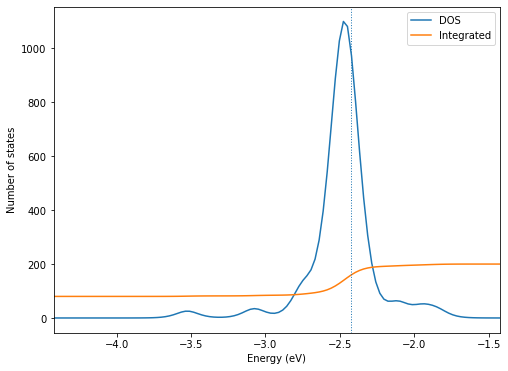

In [116]:
figsize(8,6)
plot(dos_NM[:,0], dos_NM[:,1], label='DOS')
plot(dos_NM[:,0], 10*dos_NM[:,2], label='Integrated')
xlim(Efermi_NM-2, Efermi_NM+1)
axvline(Efermi_NM, ls=':', lw=1)
xlabel('Energy (eV)')
ylabel('Number of states')
legend();

#### Ferromagnetic case

In [113]:
dos = loadtxt('work_06/Fe_FMo_DOS').reshape(2,-1,5)
# Convert from Ha to eV
dos[:,:,0] *= un.Ha
Efermi = Fe_FM.calc.get_fermi_level()

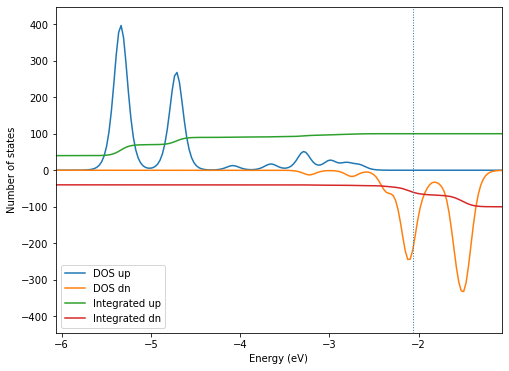

In [119]:
figsize(8,6)
plot(dos[0,:,0], dos[0,:,1], label='DOS up')
plot(dos[1,:,0], -dos[1,:,1], label='DOS dn')
plot(dos[0,:,0], 10*dos[0,:,2], label='Integrated up')
plot(dos[1,:,0], -10*dos[1,:,2], label='Integrated dn')
xlim(Efermi-4, Efermi+1)
axvline(Efermi, ls=':', lw=1)
xlabel('Energy (eV)')
ylabel('Number of states')
legend();